<a href="https://colab.research.google.com/github/Fernandinho937/Data-Science-II/blob/main/DepartamentoDeMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Departamento de Marketing

#####Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

Importação das bibliotecas e base de dados

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [16]:
creditcard_df.shape

(8950, 18)

In [17]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [19]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [20]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [21]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [22]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


##Visualização e exploração dos dados

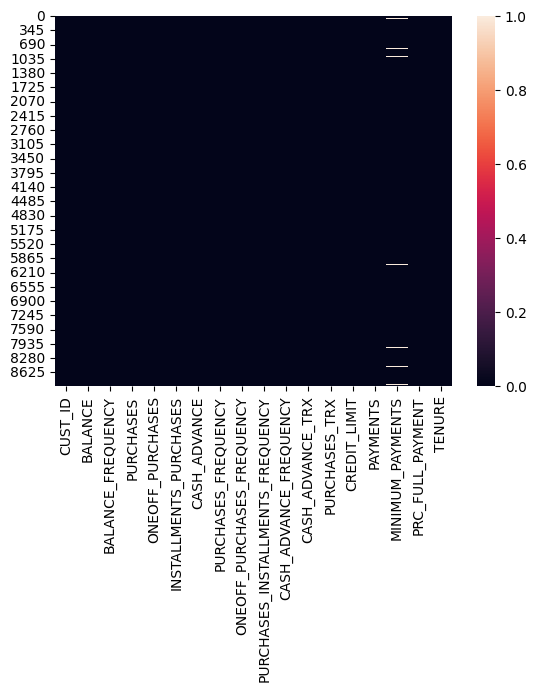

In [23]:
sns.heatmap(creditcard_df.isnull());

In [24]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [25]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [26]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [27]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [28]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [29]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


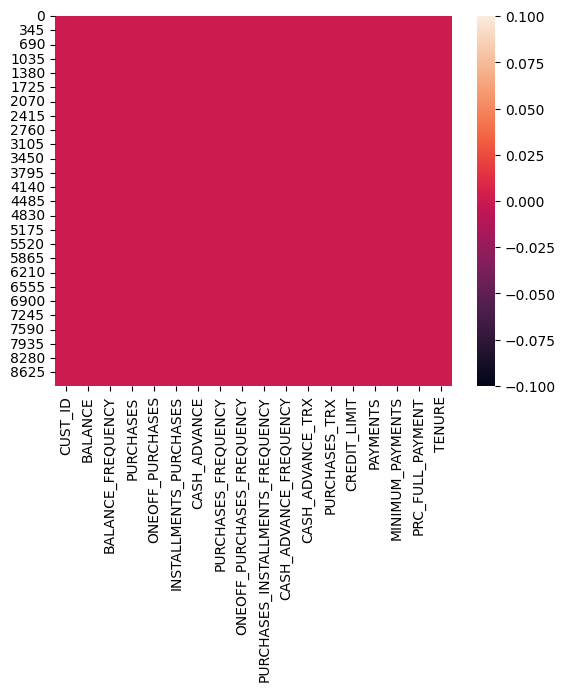

In [30]:
sns.heatmap(creditcard_df.isnull());

In [31]:
creditcard_df.duplicated().sum()

0

In [32]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [33]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [35]:
len(creditcard_df.columns)

17

<ipython-input-36-5794aba77f1b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
<ipython-input-36-5794aba77f1b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
<ipython-input-36-5794aba77f

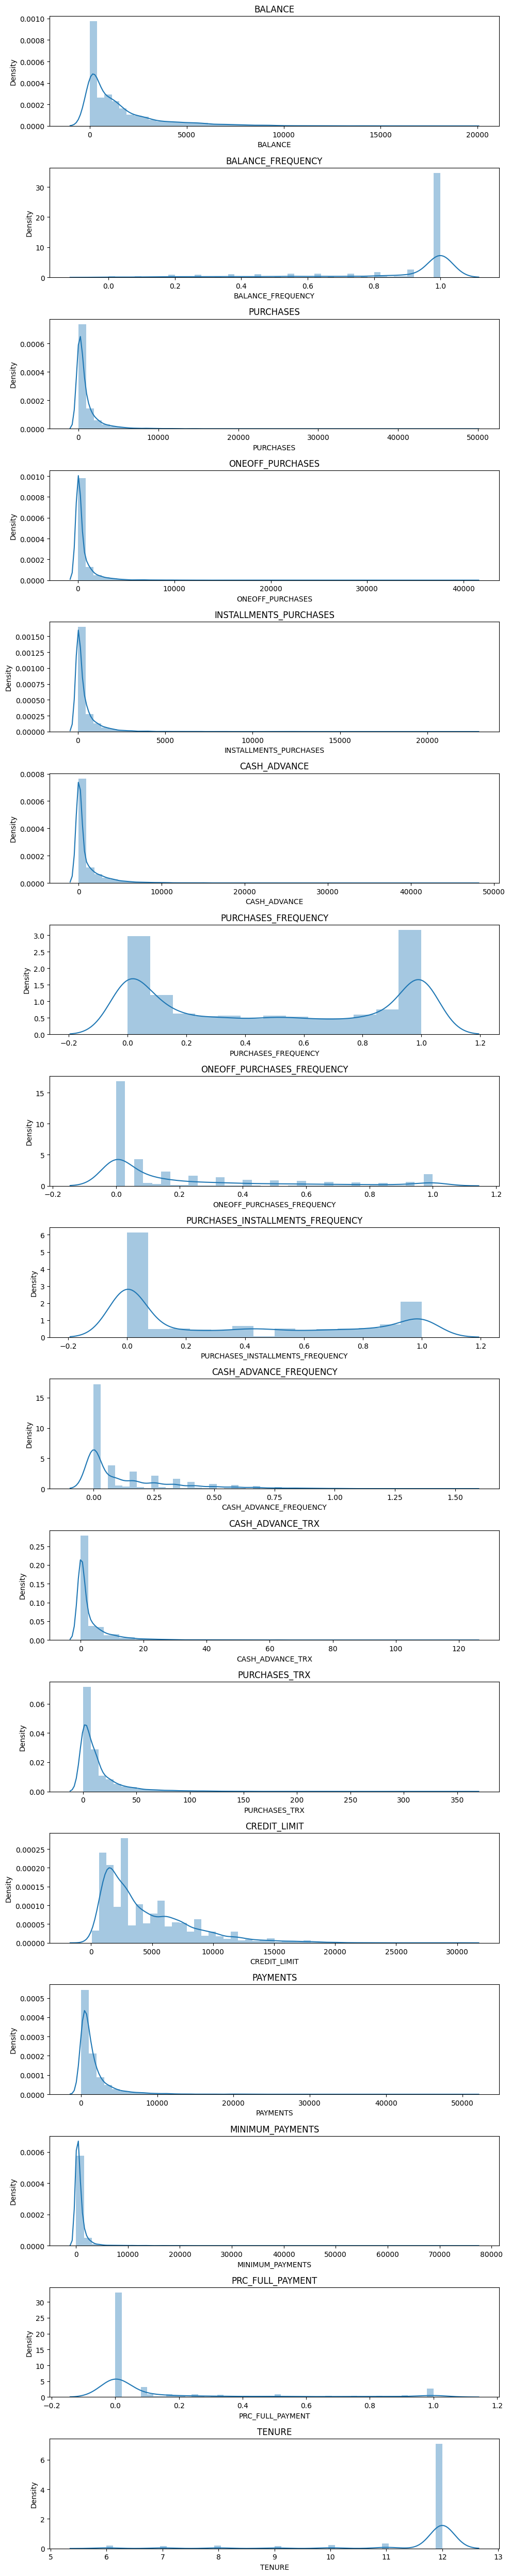

In [36]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [37]:
correlations = creditcard_df.corr()

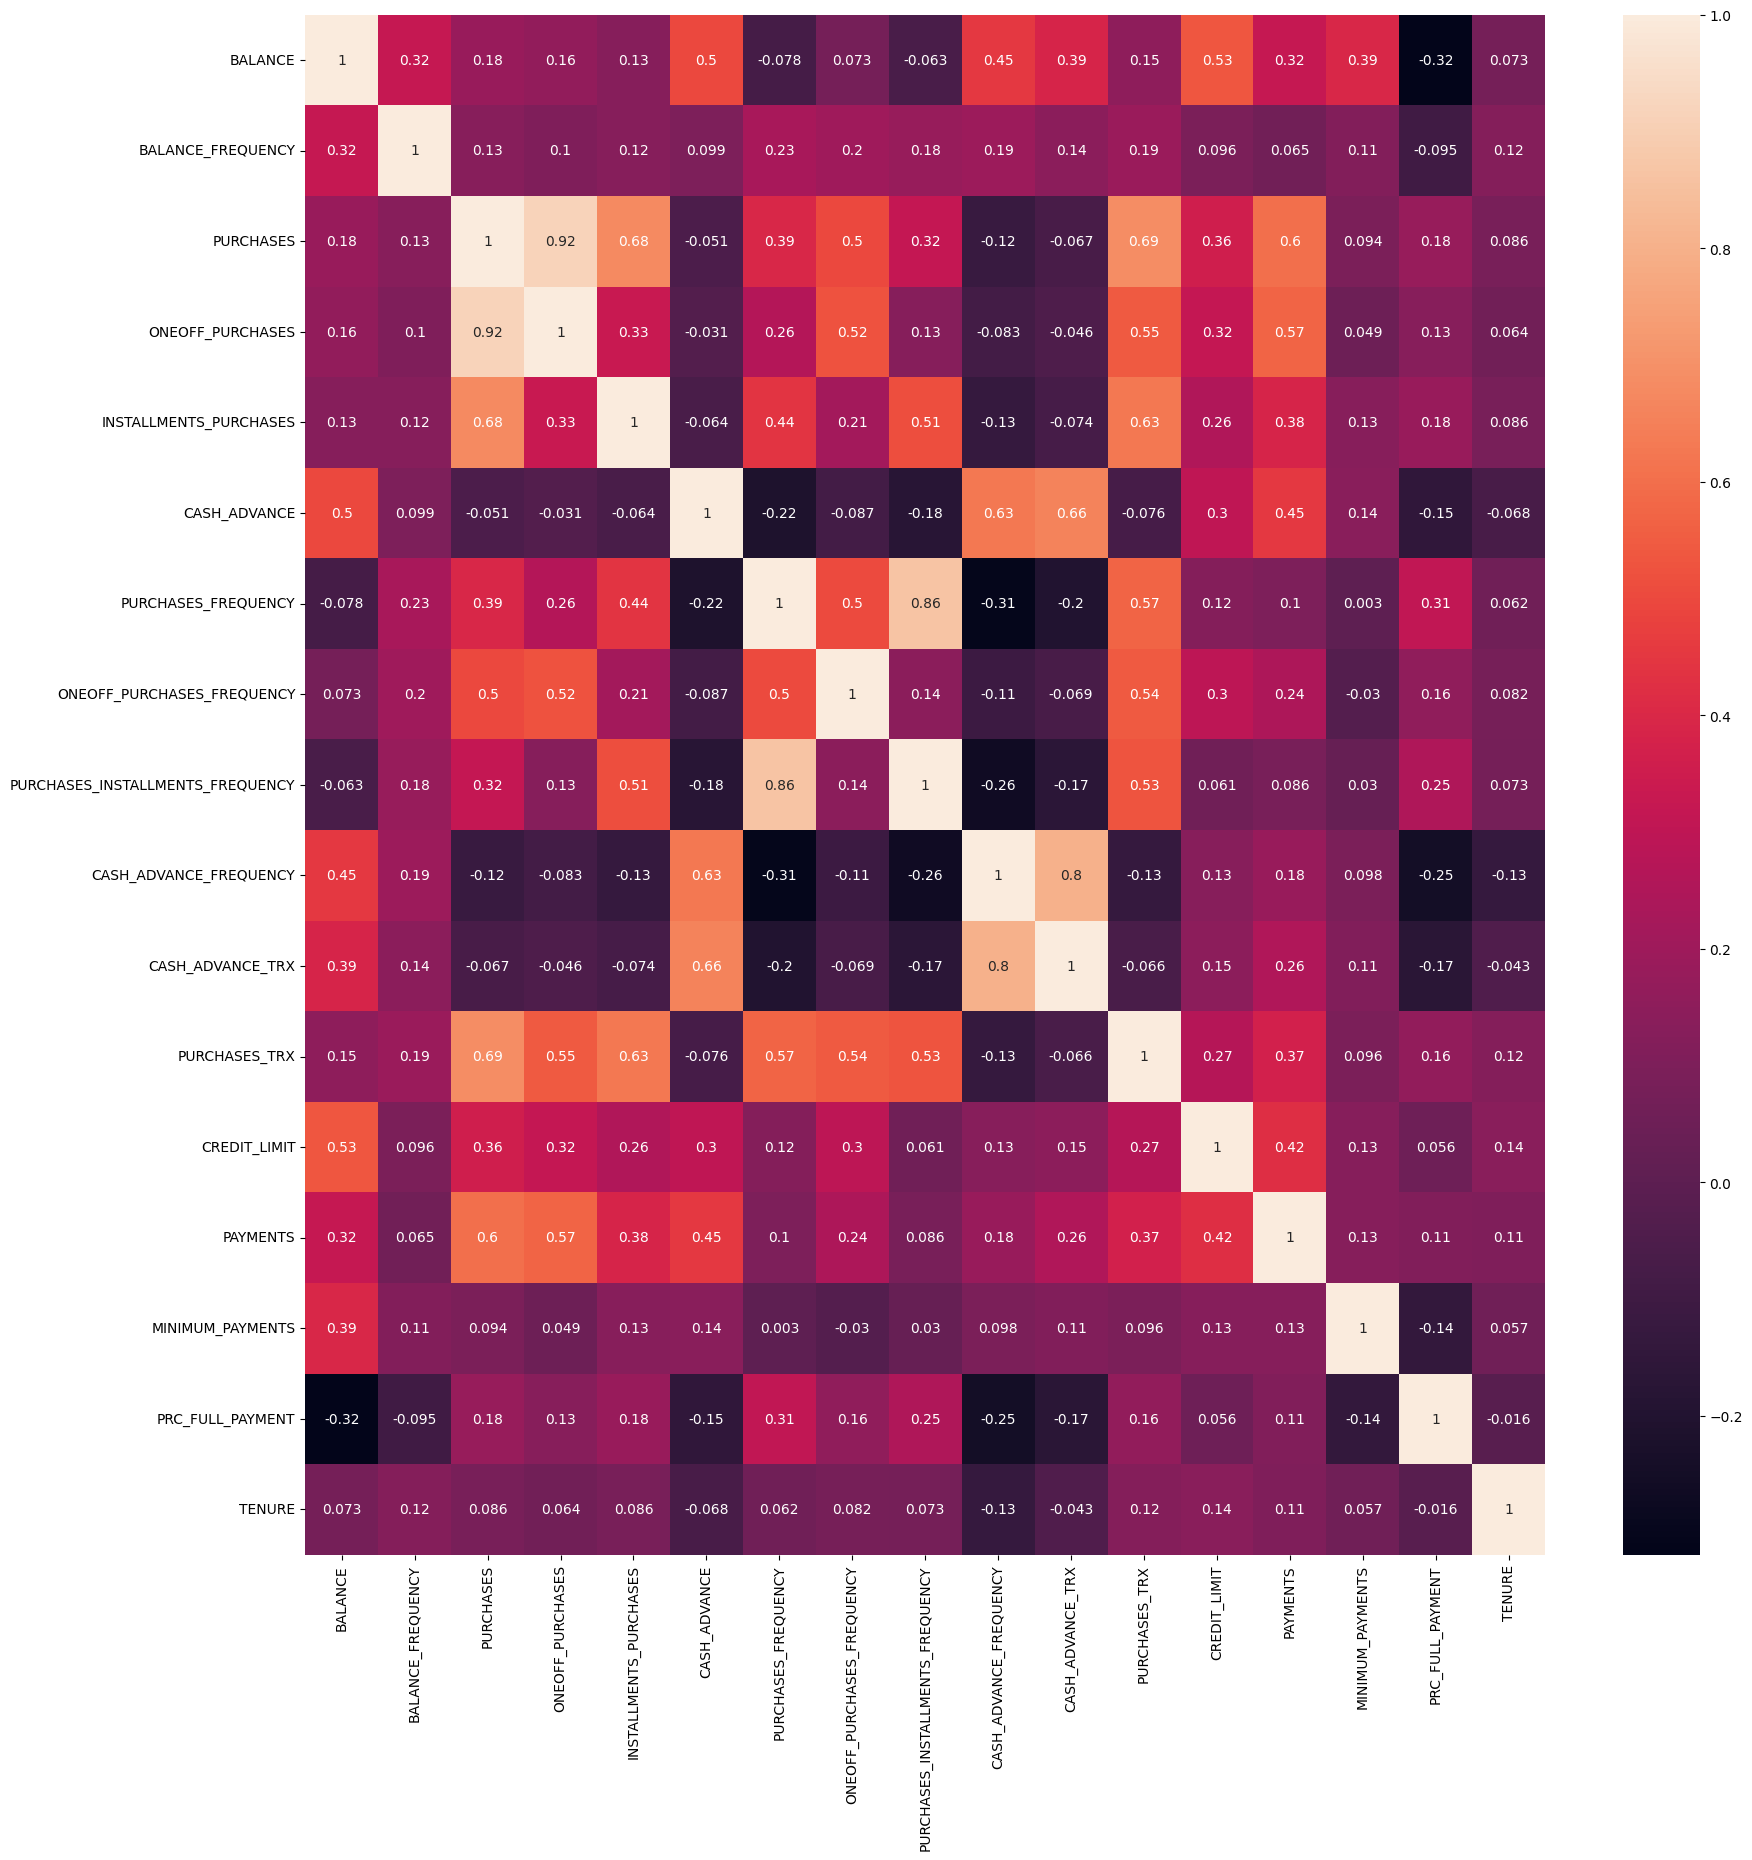

In [38]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

##Definição do número de clusters usando o Elbow Method

######Mais detalhes
https://en.wikipedia.org/wiki/Elbow_method_(clustering)
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [39]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [40]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [41]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [42]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [43]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [44]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [45]:
print(wcss_1)

[152149.99999999875, 127784.8149822642, 112651.91455264163, 104749.3342802848, 91503.39136285227, 86368.19232119949, 80119.74450129592, 76363.32605915415, 71603.63158496491, 66995.87139980214, 65157.57655765659, 61382.174219276305, 60685.98592579483, 57663.67670615645, 56920.793416458386, 54315.94465906741, 53855.41957953914, 52222.12320604116, 51088.76129763251]


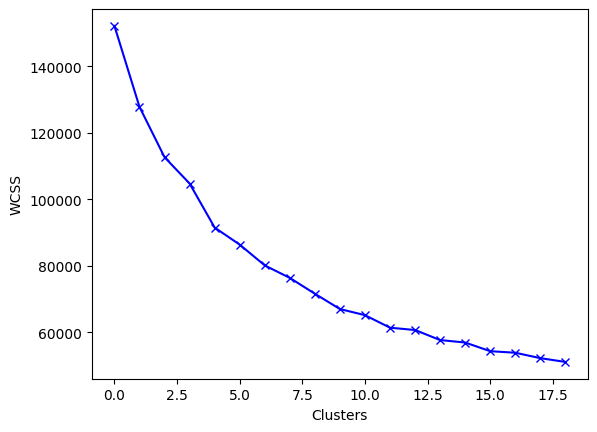

In [46]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

##Agrupamento com k-means

In [47]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [48]:
labels, len(labels)

(array([7, 2, 4, ..., 0, 7, 7], dtype=int32), 8950)

In [49]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2114,  214, 1126,   23, 1167, 1280,  353, 2673]))

In [50]:
kmeans.cluster_centers_

array([[-4.02461941e-01,  3.06845048e-01, -5.57708710e-02,
        -2.55447213e-01,  3.37391571e-01, -3.63551019e-01,
         1.00320731e+00, -4.09473113e-01,  1.19991261e+00,
        -4.71911672e-01, -3.63776447e-01,  1.48544025e-01,
        -3.23187471e-01, -2.42001946e-01, -6.25485278e-02,
         3.78966688e-01, -3.20285716e-02],
       [ 1.78338269e+00,  3.48439938e-01, -1.32473643e-02,
        -4.09907963e-03, -2.41070957e-02,  3.89071604e+00,
        -2.32934208e-01,  1.70737738e-02, -1.85760415e-01,
         2.57240725e+00,  3.68787837e+00, -2.29175861e-02,
         1.29195037e+00,  2.42159089e+00,  5.71019394e-01,
        -2.20856412e-01,  7.08617013e-02],
       [ 1.27541374e+00,  3.73283470e-01, -3.08280526e-01,
        -2.21228279e-01, -3.22532736e-01,  1.10038801e+00,
        -6.45982466e-01, -3.29897120e-01, -5.60250855e-01,
         1.49025409e+00,  1.08728362e+00, -3.86351781e-01,
         6.52063250e-01,  1.61957796e-01,  4.75078261e-01,
        -4.46157515e-01, -1.7

In [51]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.402462,0.306845,-0.055771,-0.255447,0.337392,-0.363551,1.003207,-0.409473,1.199913,-0.471912,-0.363776,0.148544,-0.323187,-0.242002,-0.062549,0.378967,-0.032029
1,1.783383,0.348440,-0.013247,-0.004099,-0.024107,3.890716,-0.232934,0.017074,-0.185760,2.572407,3.687878,-0.022918,1.291950,2.421591,0.571019,-0.220856,0.070862
2,1.275414,0.373283,-0.308281,-0.221228,-0.322533,1.100388,-0.645982,-0.329897,-0.560251,1.490254,1.087284,-0.386352,0.652063,0.161958,0.475078,-0.446158,-0.178184
3,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
4,-0.138194,0.393731,0.542947,0.662638,0.066208,-0.330294,0.987501,1.873745,0.212388,-0.407939,-0.332422,0.628313,0.432112,0.144893,-0.161680,0.433233,0.205725
5,-0.699361,-2.151116,-0.318081,-0.237316,-0.316003,-0.310517,-0.566116,-0.438086,-0.458317,-0.486824,-0.363993,-0.428733,-0.211440,-0.224742,-0.254954,0.258324,-0.157719
6,1.049632,0.464705,2.517987,1.826995,2.597271,-0.149691,1.161850,1.553505,1.266677,-0.281455,-0.165978,3.135014,1.311985,1.455848,0.562991,0.259547,0.337394
7,-0.121188,0.366140,-0.350615,-0.234203,-0.398634,-0.174804,-0.825006,-0.370664,-0.746087,-0.008004,-0.122366,-0.475211,-0.410494,-0.295968,-0.087210,-0.451849,0.033325


######Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

######Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

######Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

######Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863)

In [52]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,726.784270,0.949959,884.049508,168.447318,716.166656,216.487643,0.892986,0.080304,0.841313,0.040710,0.766320,18.402081,3318.561203,1032.571929,718.439837,0.264556,11.474456
1,5276.435363,0.959813,974.901636,585.633738,389.267897,9137.884398,0.396863,0.207551,0.290611,0.649909,28.415888,14.140187,9195.093458,8743.412210,2194.943154,0.089118,11.612150
2,4219.140866,0.965698,344.558739,225.243739,119.405293,3286.436178,0.231087,0.104043,0.141779,0.433359,10.668739,5.106572,6866.922332,2201.995802,1971.356389,0.023221,11.278863
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,1276.834973,0.970542,2163.218732,1692.280377,470.938355,286.229942,0.886682,0.761432,0.448846,0.053511,0.980291,30.327335,6066.648750,2152.594747,487.417475,0.280428,11.792631
5,108.813623,0.367691,323.619781,198.541664,125.309992,327.701468,0.263141,0.071768,0.182290,0.037726,0.764844,4.053125,3725.143667,1082.536402,270.046408,0.229270,11.306250
6,3749.196095,0.987355,6382.923031,3624.874873,2759.747875,664.961746,0.956657,0.665898,0.867847,0.078822,2.116147,92.634561,9267.988669,5947.680645,2176.233262,0.229628,11.968839
7,1312.231675,0.964006,254.110857,203.708260,50.587737,612.298886,0.159236,0.091881,0.067923,0.133543,2.413767,2.897868,3000.904103,876.345002,660.966761,0.021557,11.561915


In [53]:
labels, len(labels)

(array([7, 2, 4, ..., 0, 7, 7], dtype=int32), 8950)

In [54]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


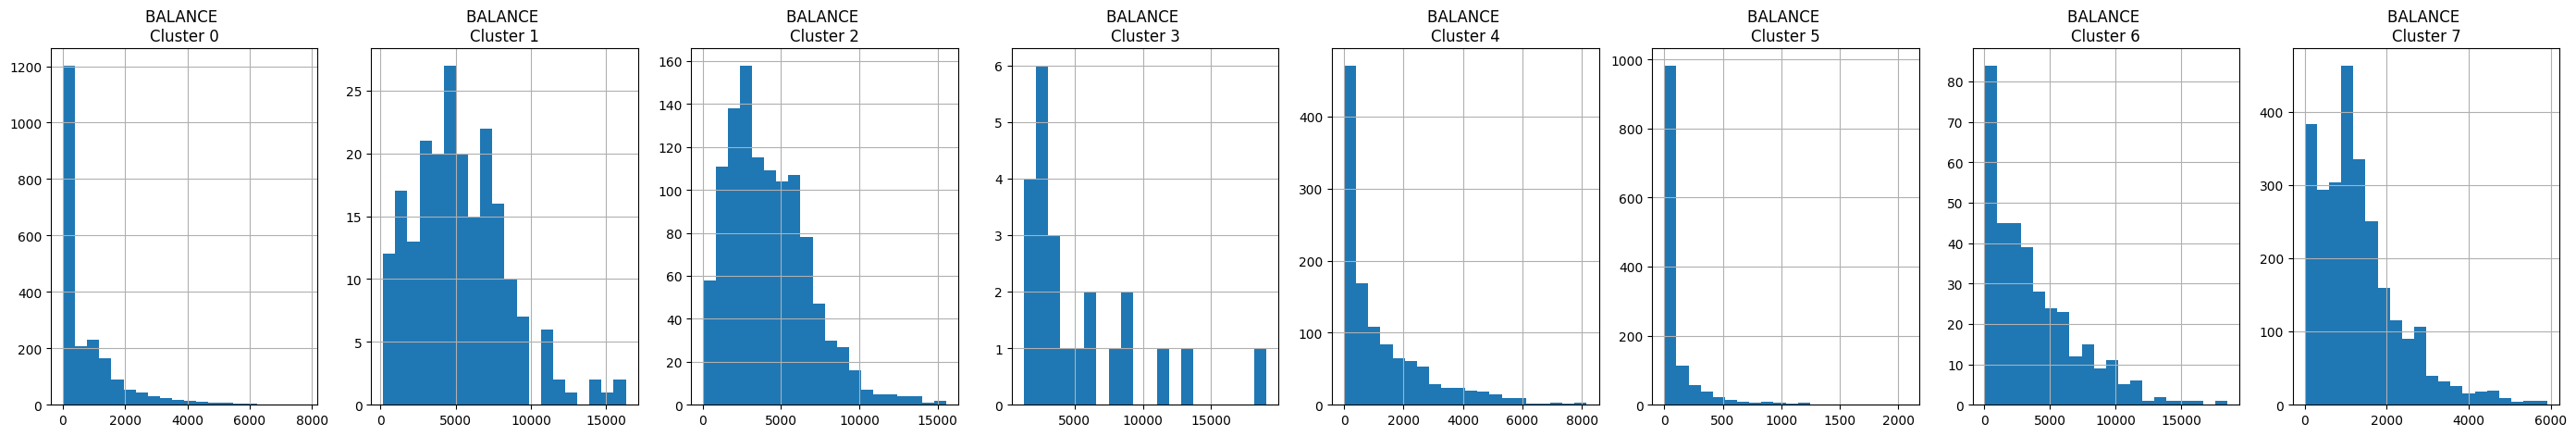

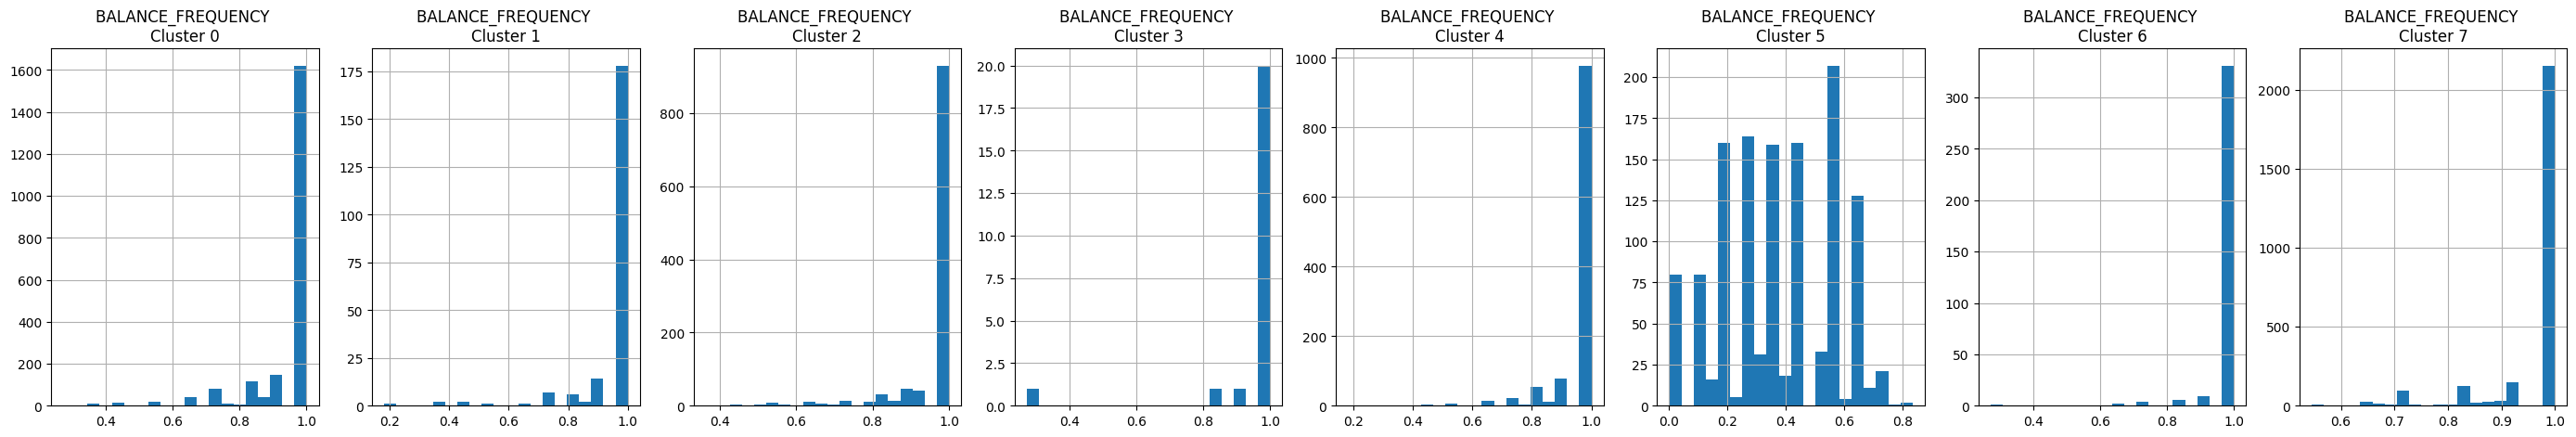

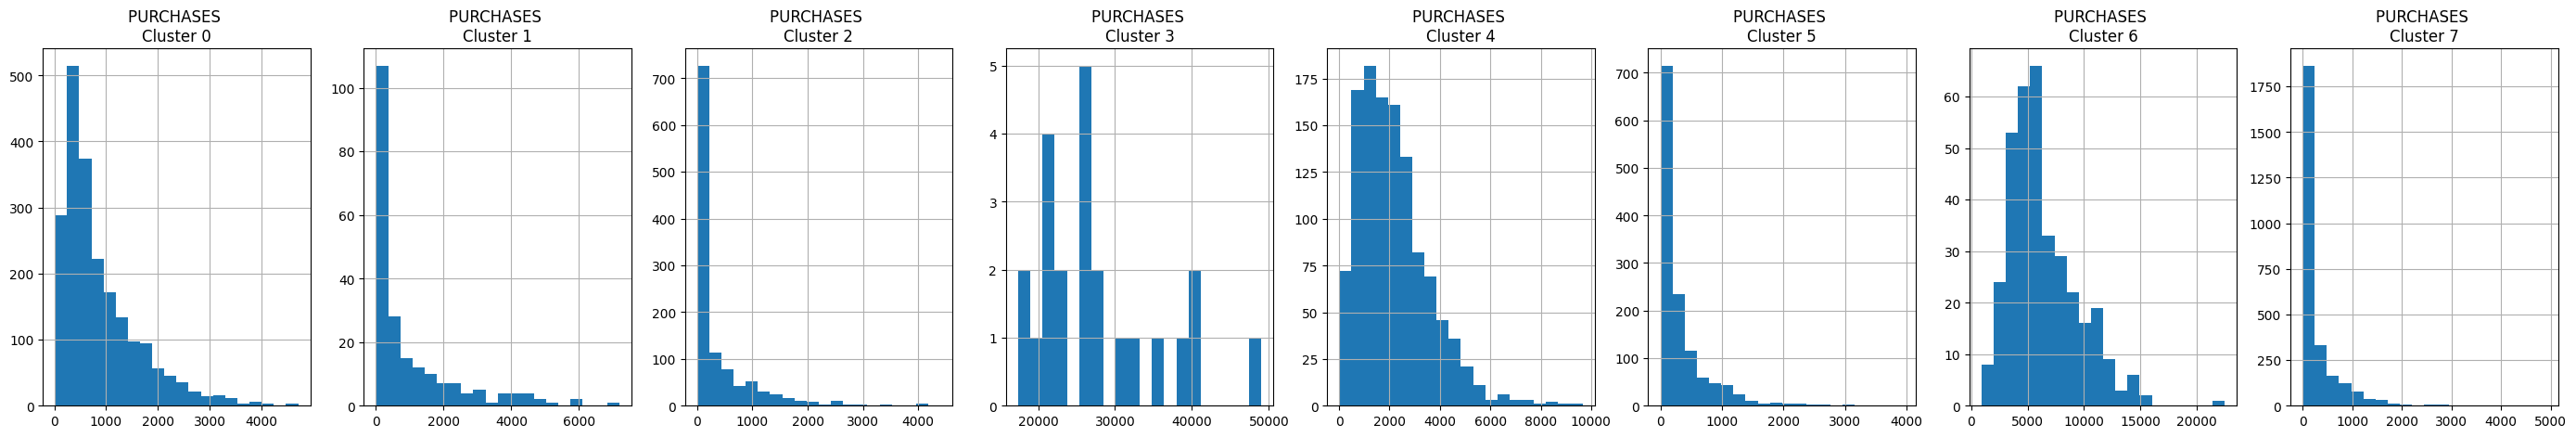

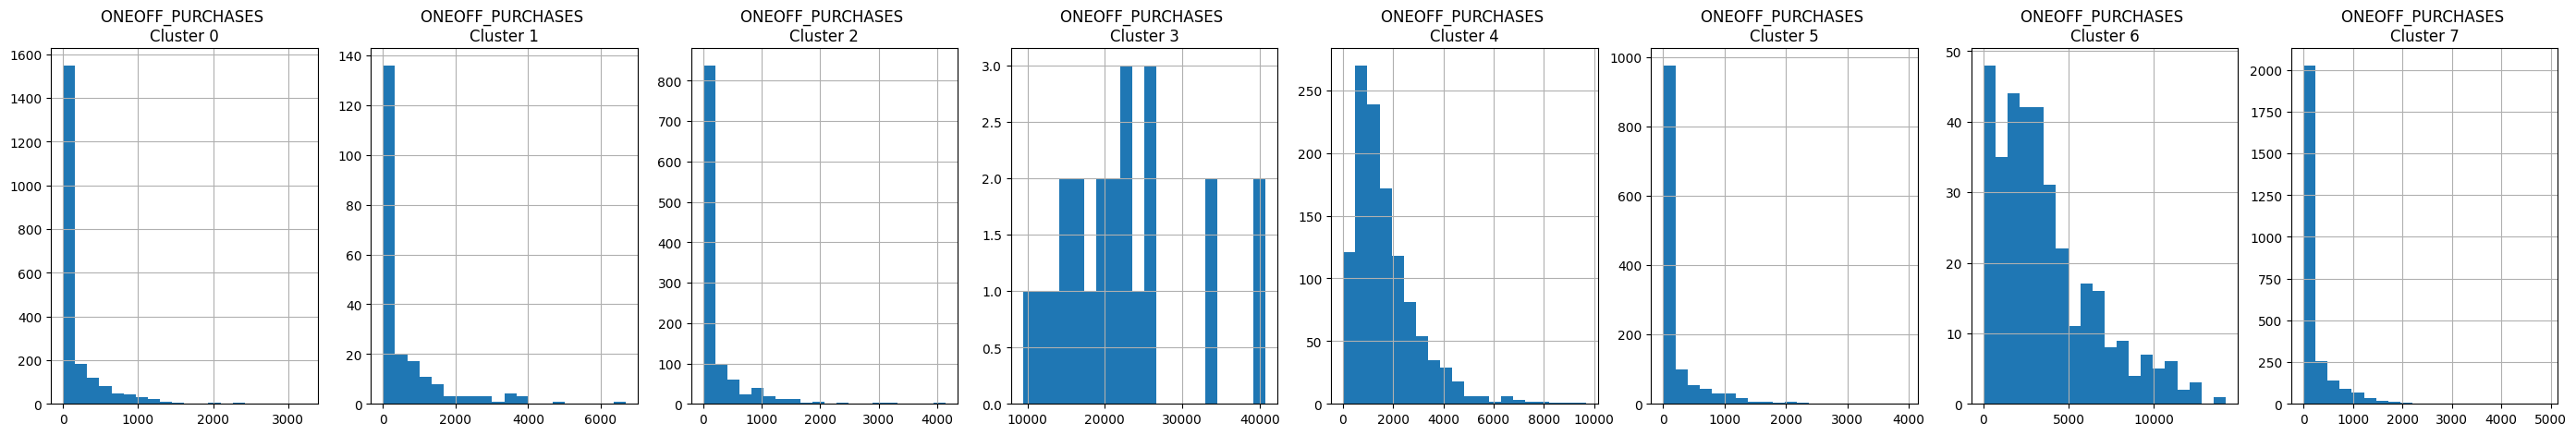

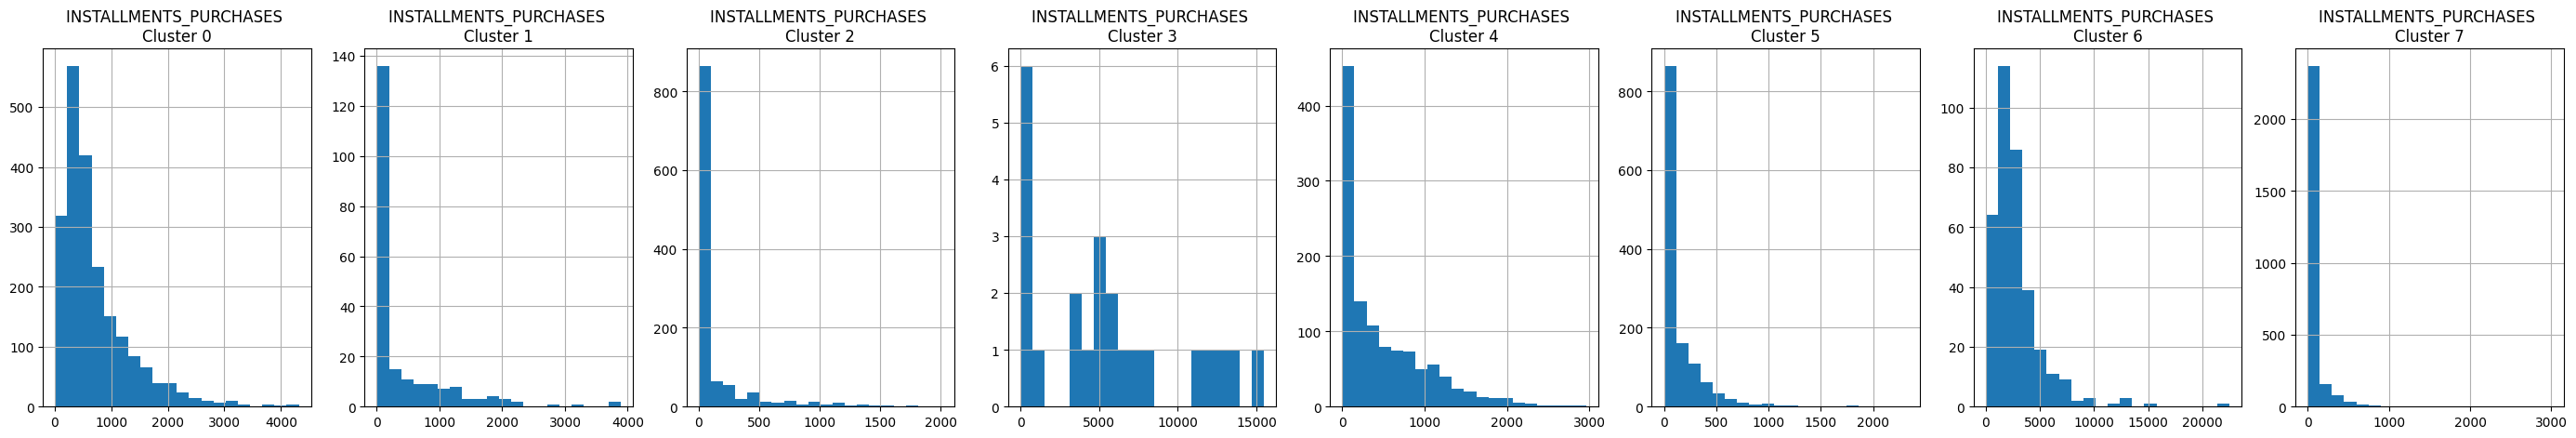

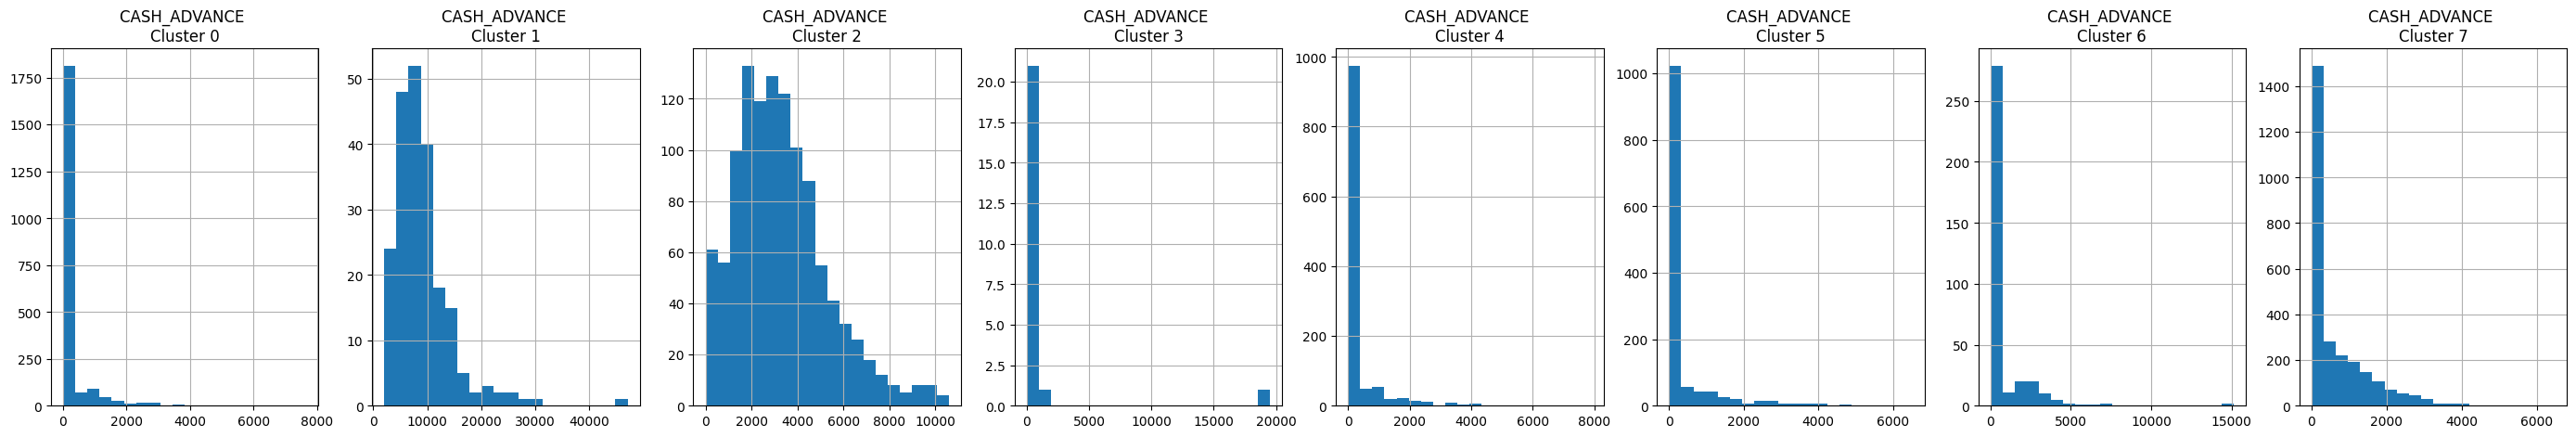

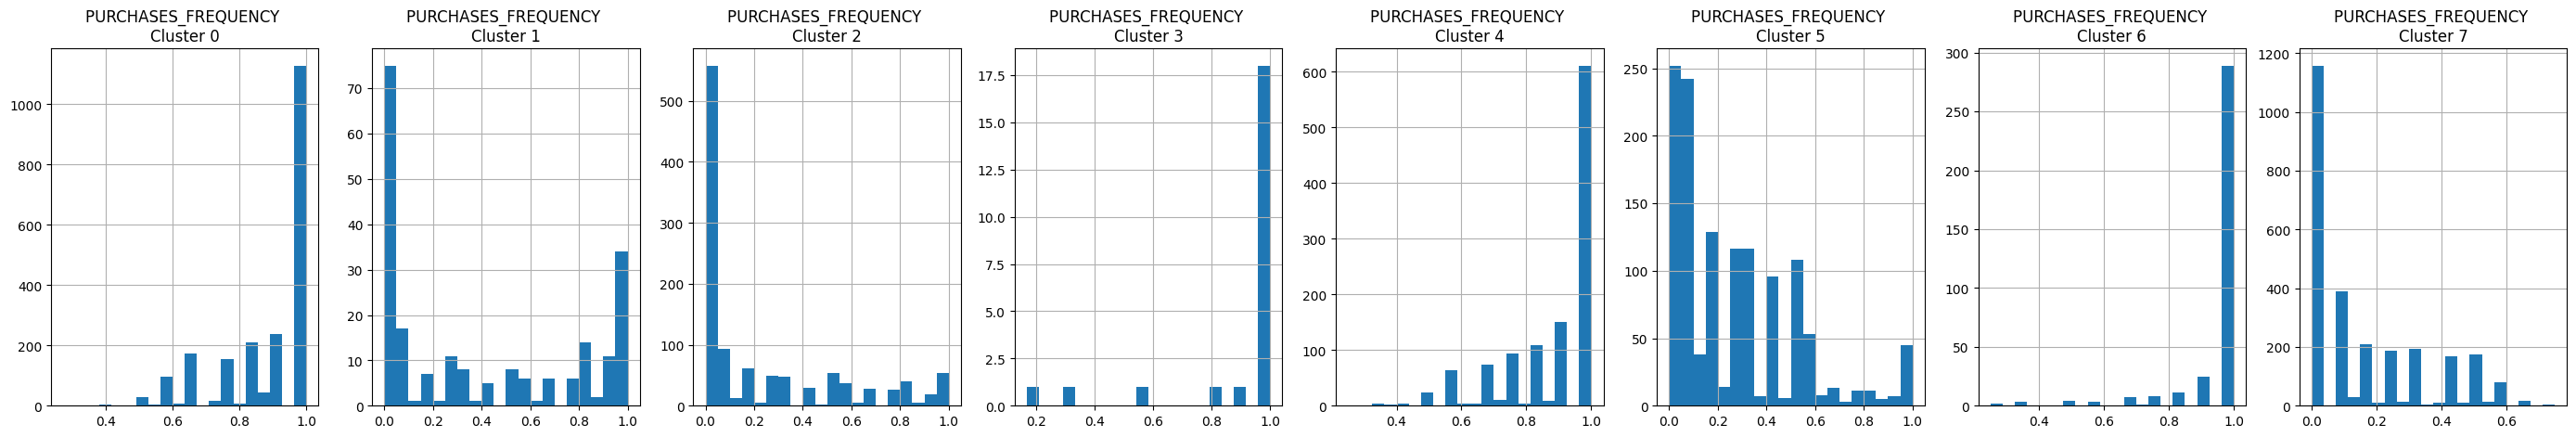

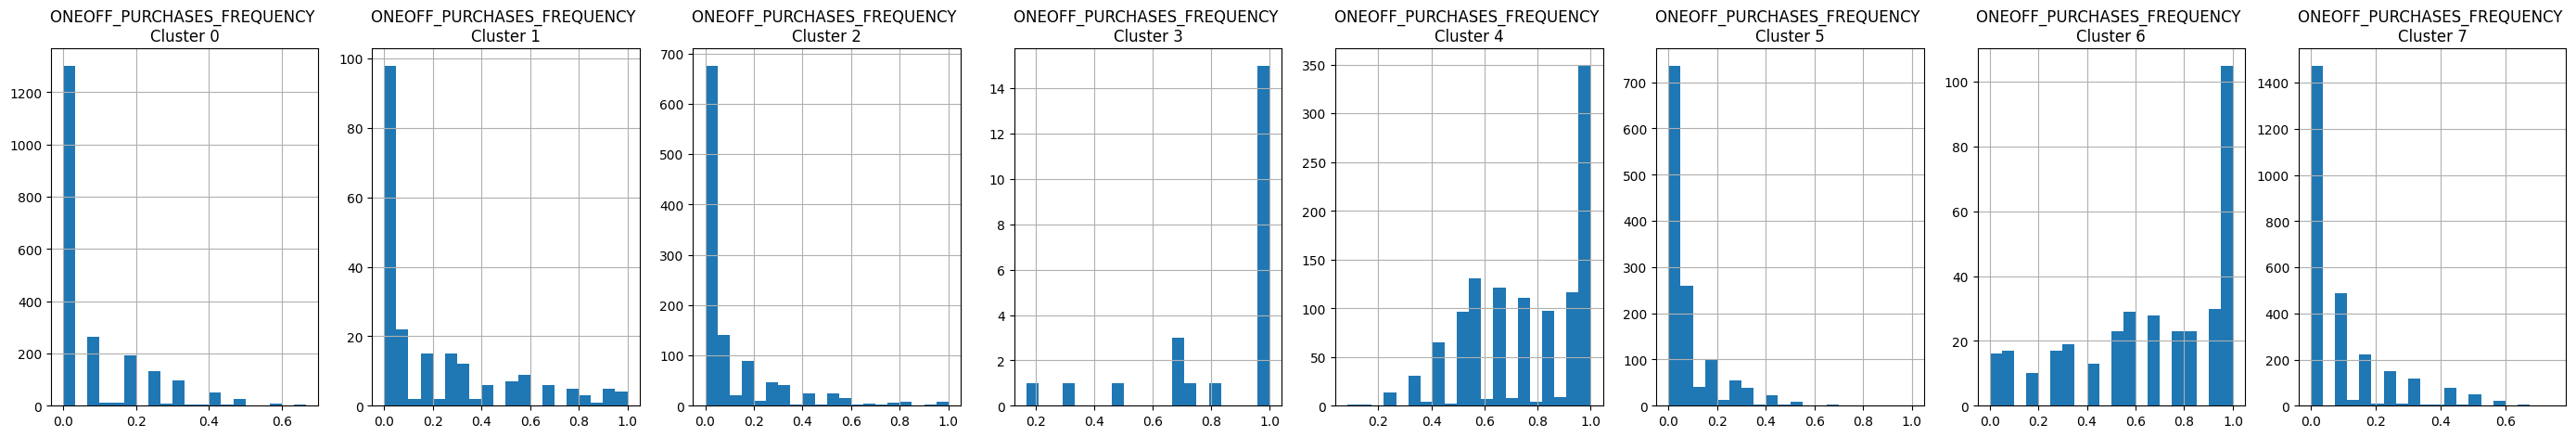

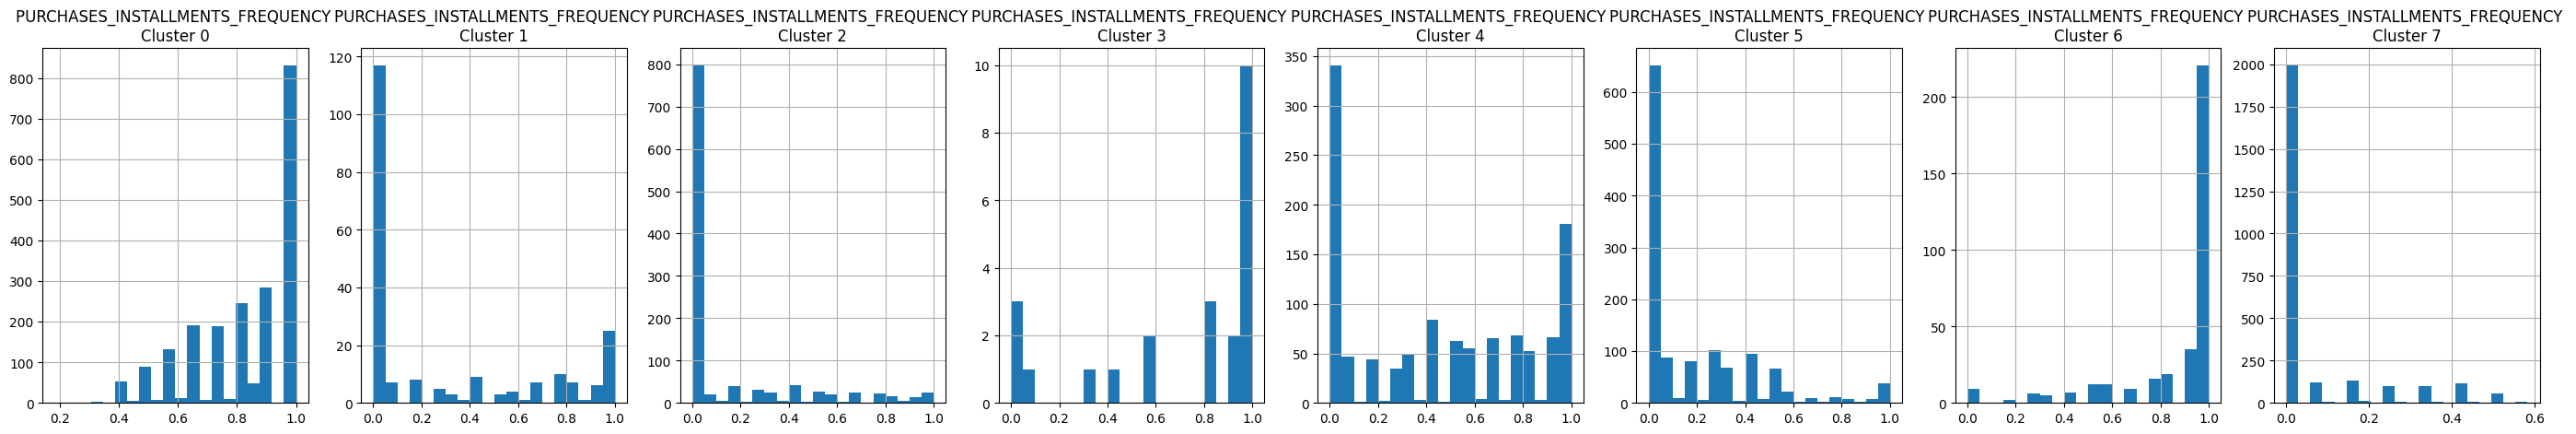

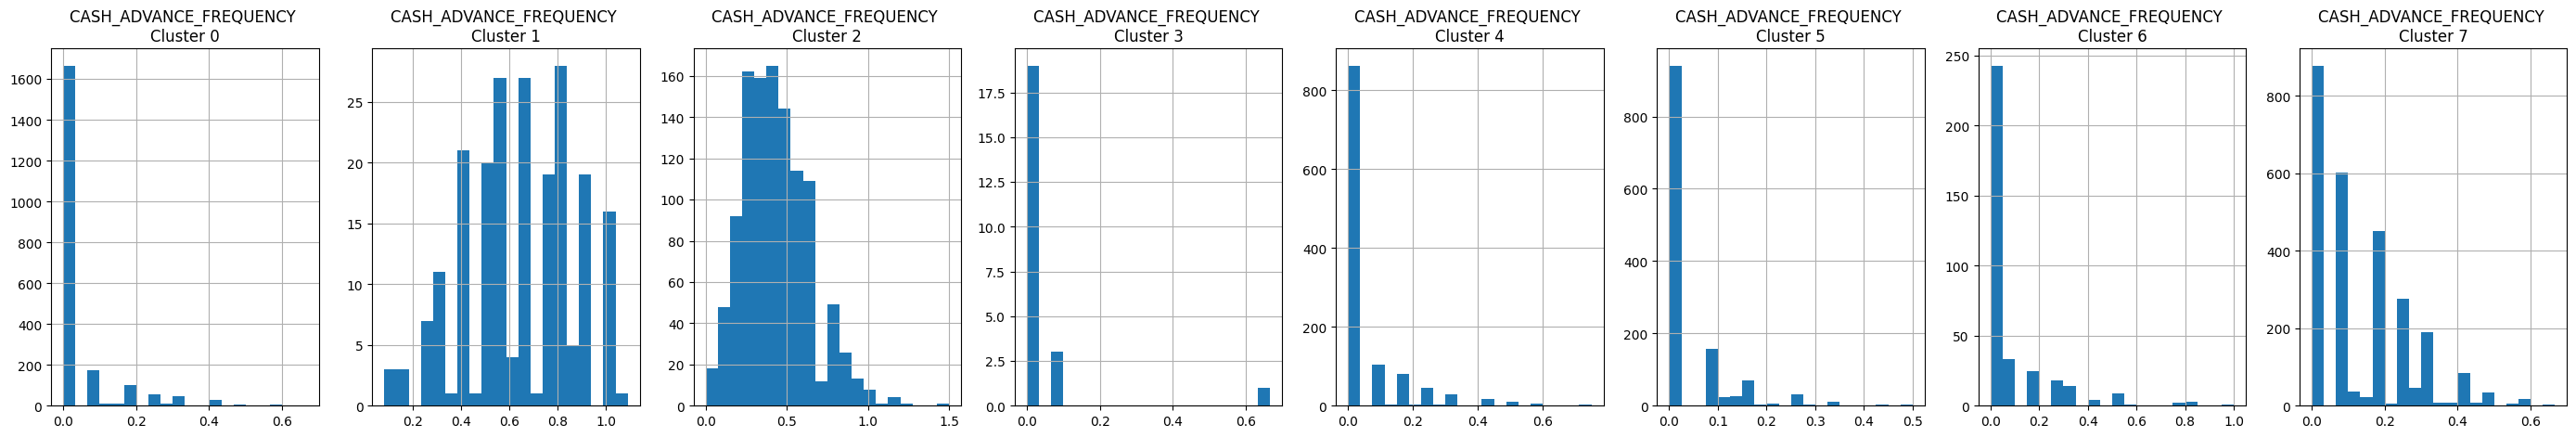

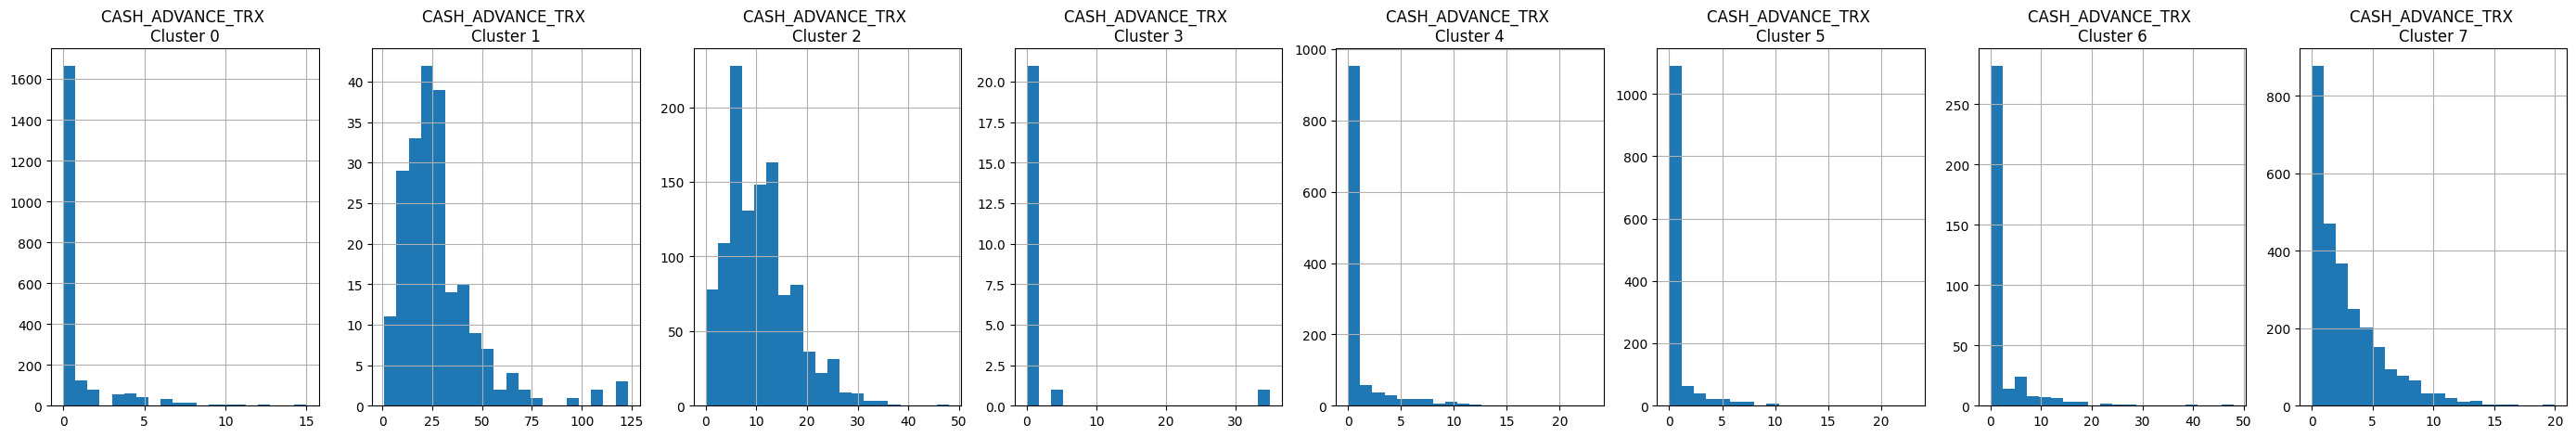

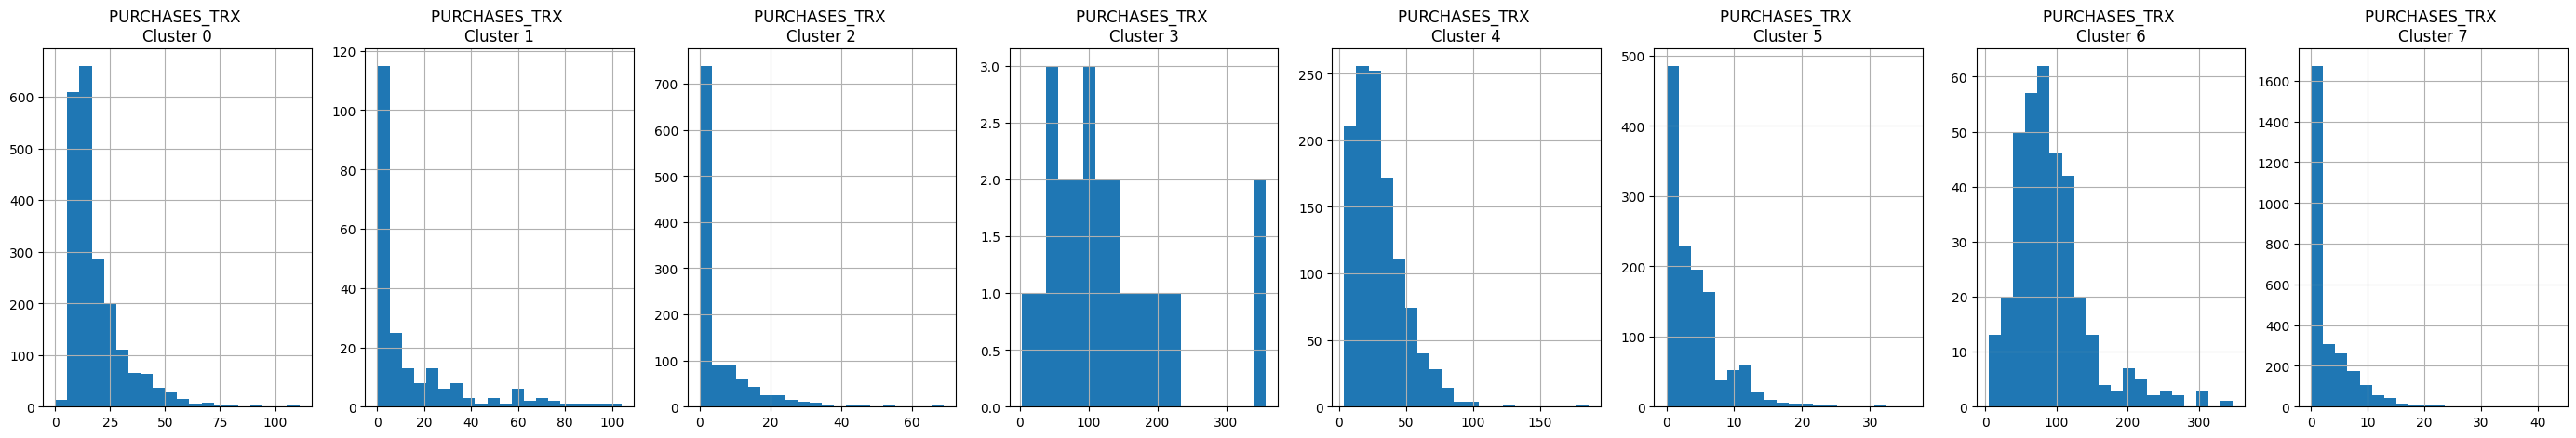

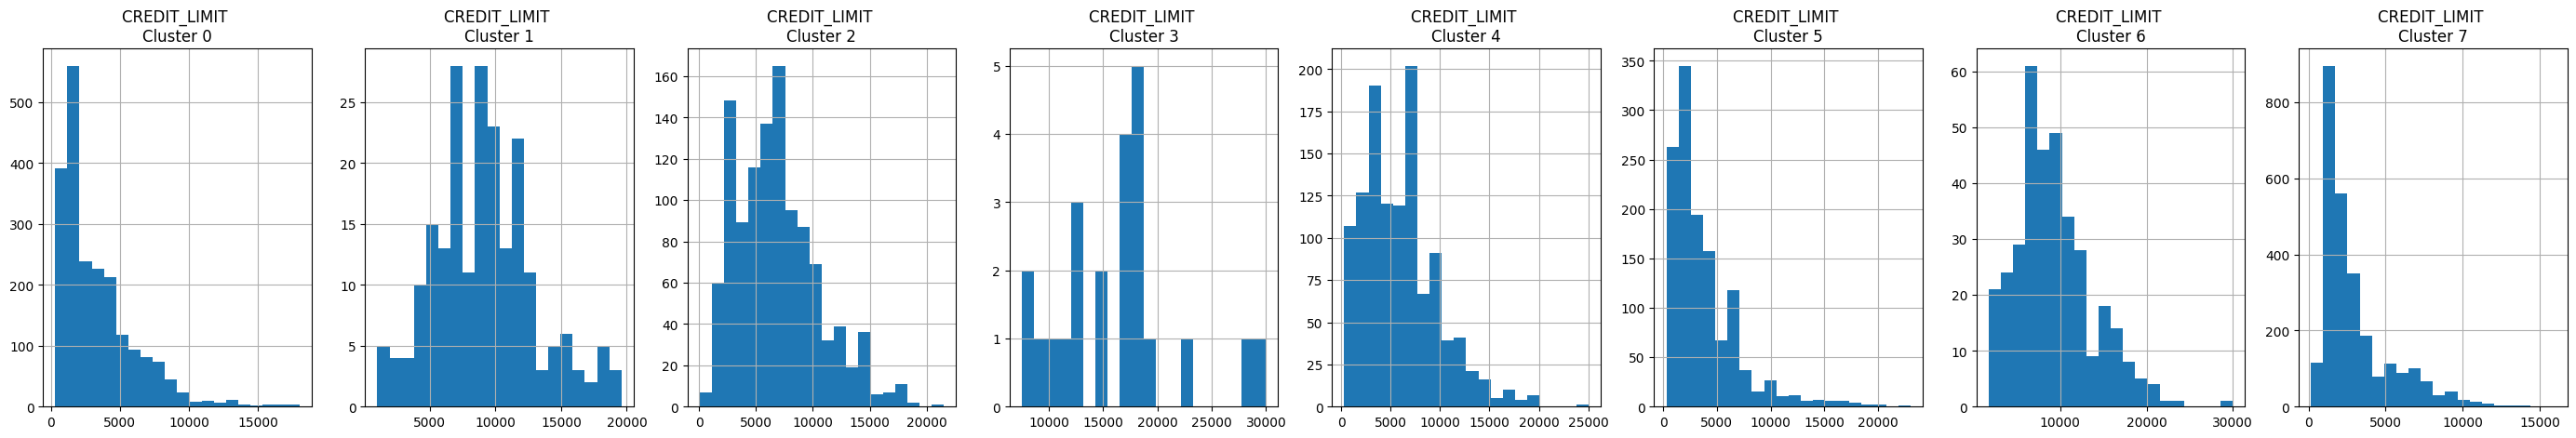

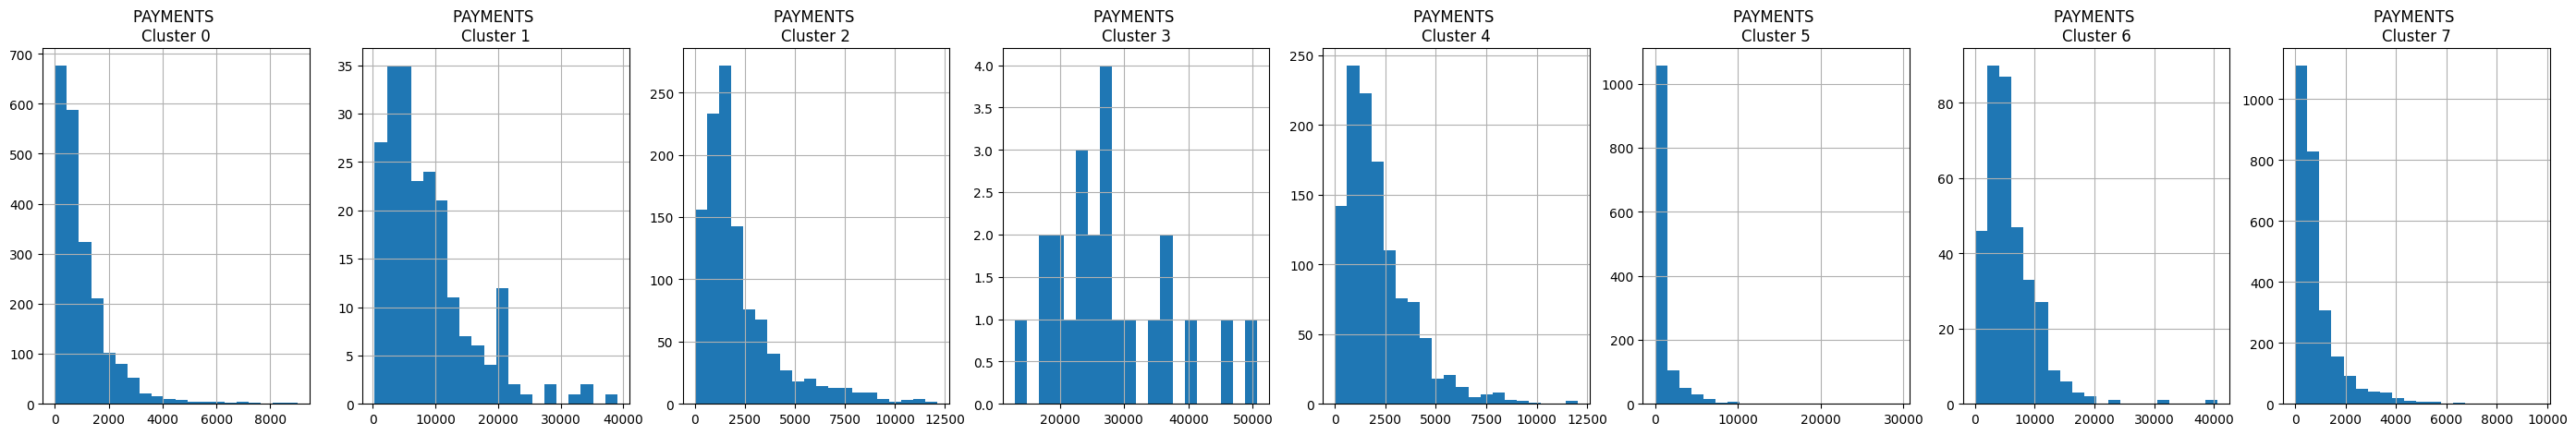

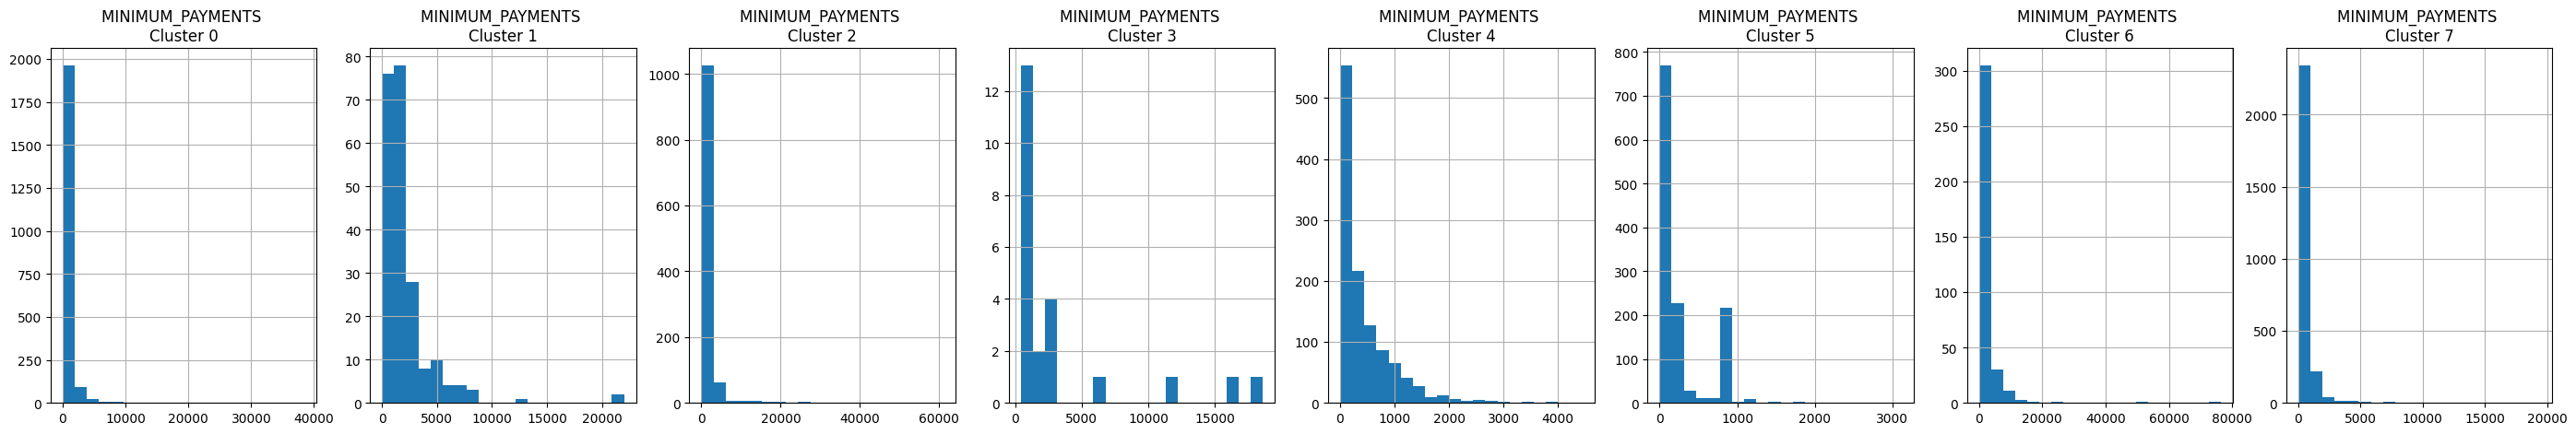

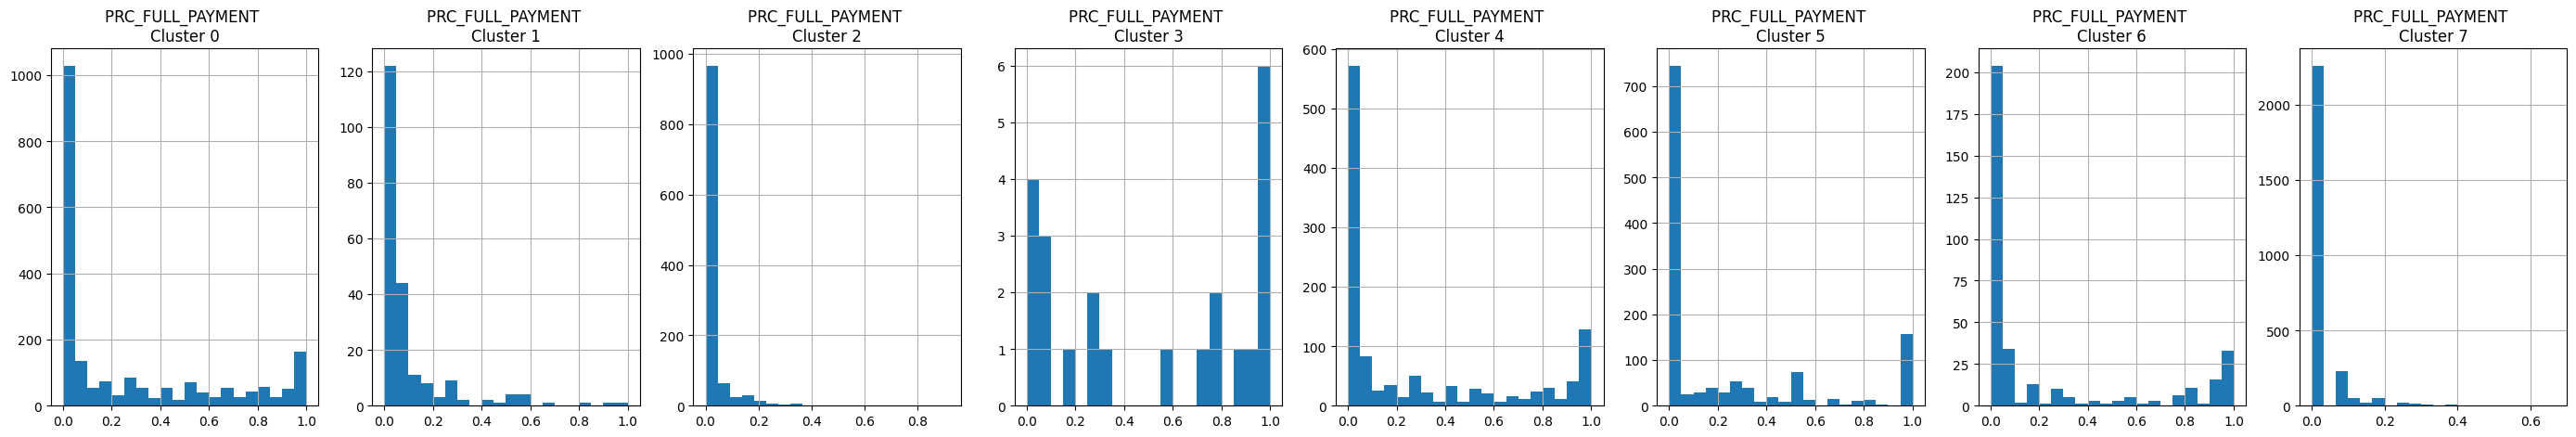

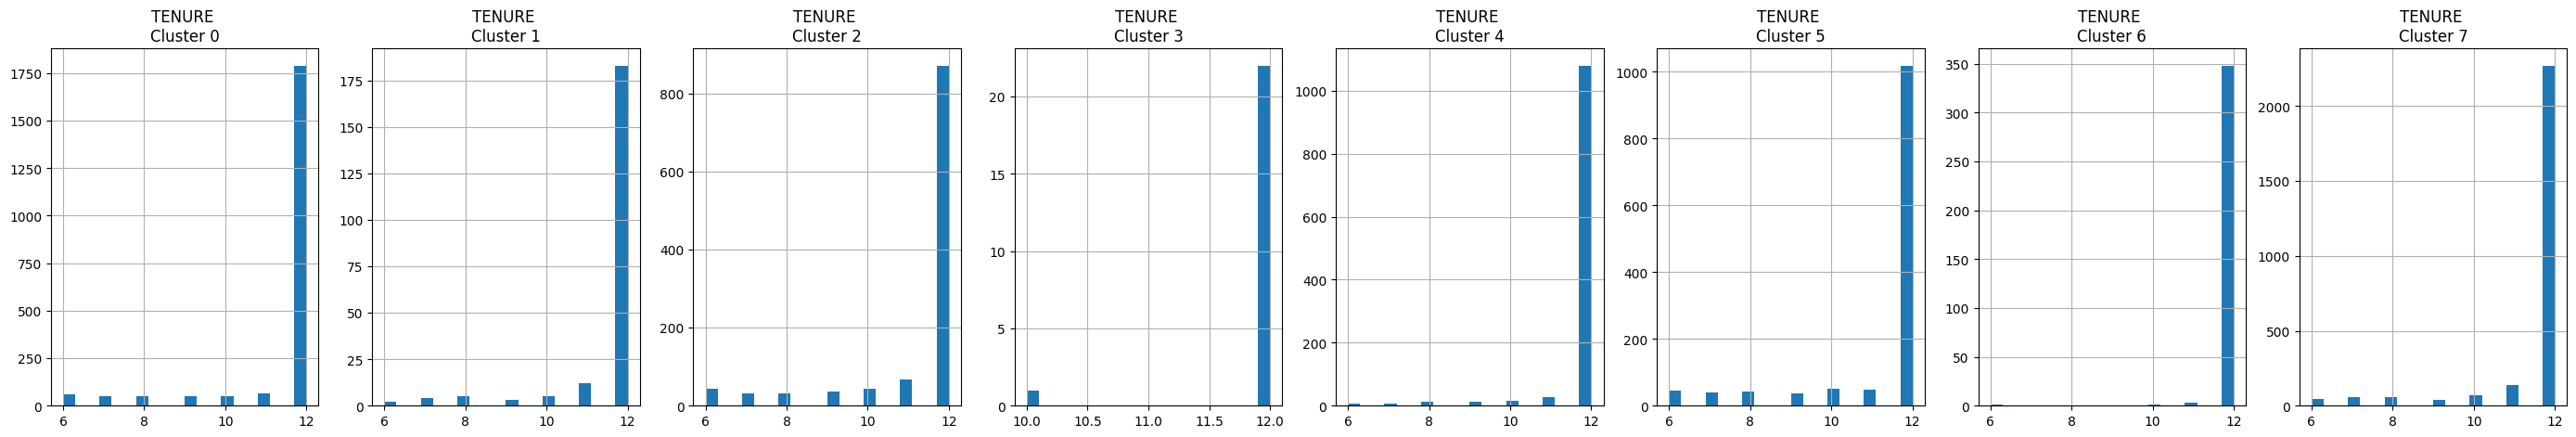

In [55]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [56]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2959,124.739834,1.0,1004.30,0.00,1004.30,0.0,0.916667,0.000000,0.833333,0.0,0,11,4000.0,970.981432,179.454519,1.000000,12,0
8522,150.269903,1.0,853.44,0.00,853.44,0.0,1.000000,0.000000,1.000000,0.0,0,12,3000.0,869.413166,173.649797,0.083333,12,0
4774,49.564532,1.0,433.50,273.94,159.56,0.0,0.909091,0.181818,0.909091,0.0,0,13,9000.0,465.466079,148.914581,0.272727,11,0
2627,172.131105,1.0,1666.95,0.00,1666.95,0.0,1.000000,0.000000,1.000000,0.0,0,38,2500.0,1326.099687,163.000040,0.916667,12,0
4787,49.433937,1.0,387.00,0.00,387.00,0.0,1.000000,0.000000,0.888889,0.0,0,9,3000.0,335.472854,122.280528,1.000000,9,0


In [57]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4734,1132.796058,1.000000,519.79,519.79,0.0,0.000000,0.583333,0.583333,0.0,0.000000,0,8,1200.0,642.723631,436.088187,0.000000,12,7
4735,101.874313,0.636364,70.00,70.00,0.0,365.228157,0.083333,0.083333,0.0,0.333333,6,1,2500.0,464.687342,178.912575,0.166667,12,7
4738,996.223227,1.000000,0.00,0.00,0.0,1398.395540,0.000000,0.000000,0.0,0.083333,1,0,8000.0,2369.167737,226.016919,0.000000,12,7
4746,24.176932,1.000000,189.85,189.85,0.0,0.000000,0.333333,0.333333,0.0,0.000000,0,4,3000.0,184.604550,100.687061,0.000000,12,7
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,7


In [58]:
credit_ordered.to_csv('cluster.csv')

##Aplicação de PCA (principal component analysis) e visualização dos resultados

In [59]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [60]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [61]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,7
1,-1.138295,2.506477,2
2,0.969684,-0.383520,4
3,-0.873628,0.043166,7
4,-1.599434,-0.688581,7


<Axes: xlabel='pca1', ylabel='pca2'>

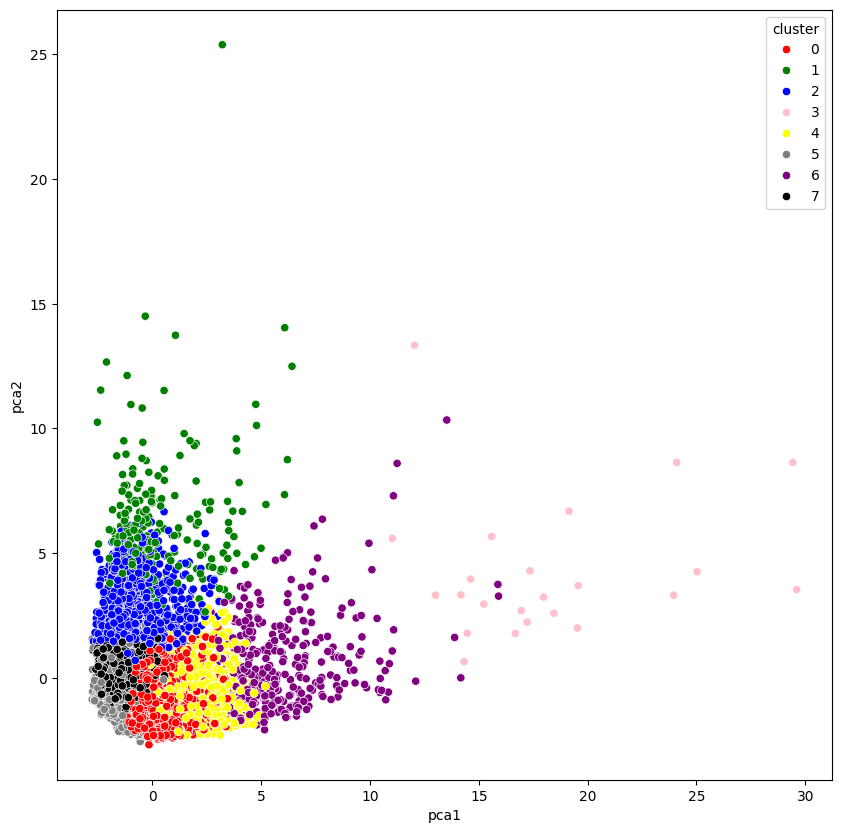

In [62]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

1.   Item da lista
2.   Item da lista


In [63]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [64]:
creditcard_df_scaled.shape

(8950, 17)

In [65]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [66]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [67]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [68]:
# encoder
encoder = Model(input_df, encoded)

In [69]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [70]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.3667
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0596
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0506
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0426
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0308
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 0.0603
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0299
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0248
Epoch 9/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0467
Epoch 10/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0331
Epoch 11/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0315
Epoch 12/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0285
Epoch 13/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0233
Epoch 14/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0191
Epoch 15/50
280/280 ━━━━━━━━━━━━━━━━━

In [71]:
creditcard_df_scaled.shape

(8950, 17)

In [72]:
compact = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [73]:
compact.shape

(8950, 10)

In [74]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [75]:
compact[0]

array([0.8043995 , 0.0423721 , 0.        , 0.878821  , 0.26294363,
       0.11411065, 0.35081527, 0.        , 0.09303808, 0.38808116],
      dtype=float32)

In [76]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

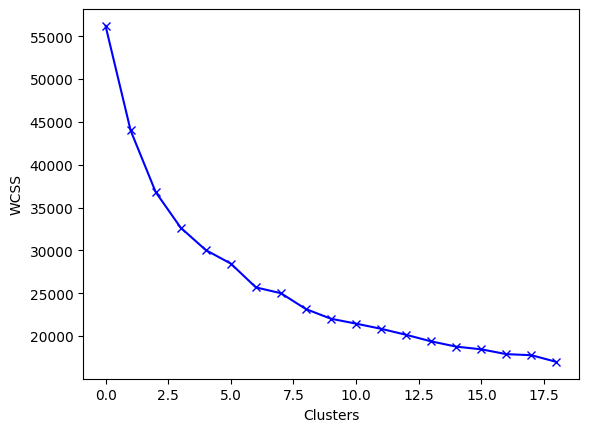

In [77]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

<ipython-input-78-7b153d4c97fa>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
<ipython-input-78-7b153d4c97fa>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


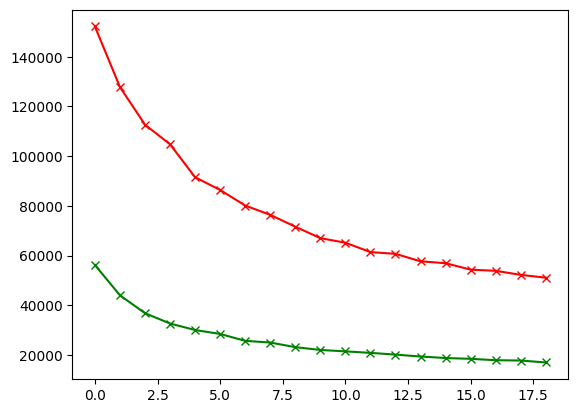

In [78]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [79]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [80]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 0, 2, ..., 0, 0, 0], dtype=int32), (8950,))

In [81]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [82]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.160914,-0.144462
1,0.590075,1.445939
2,-0.284163,-0.214870
3,0.256034,0.233463
4,-1.273027,-0.179080


In [83]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.160914,-0.144462,2
1,0.590075,1.445939,0
2,-0.284163,-0.214870,2
3,0.256034,0.233463,0
4,-1.273027,-0.179080,2


<Axes: xlabel='pca1', ylabel='pca2'>

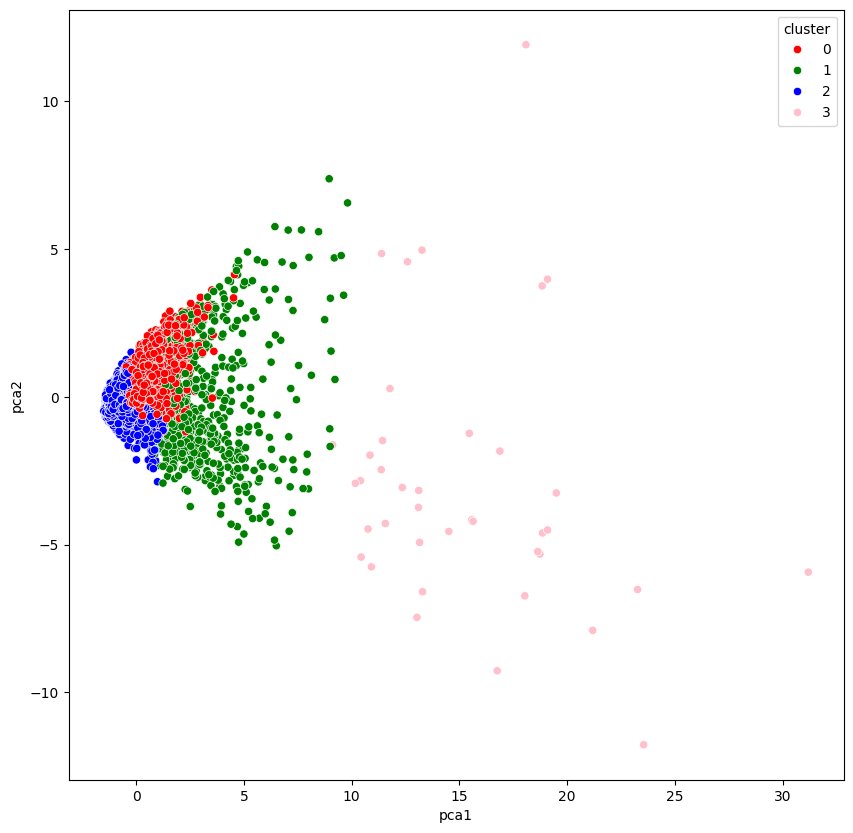

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [85]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,0
7197,147.571435,0.500000,0.00,0.00,0.0,2200.173071,0.000000,0.000000,0.0,0.200000,2,0,1200.0,2763.958077,62.025196,1.0,10,0
2505,247.857188,0.454545,0.00,0.00,0.0,872.983058,0.000000,0.000000,0.0,0.333333,10,0,1200.0,253.663706,260.216650,0.0,12,0
2509,0.000000,0.000000,609.00,0.00,609.0,0.000000,1.000000,0.000000,1.0,0.000000,0,12,2500.0,893.429001,864.206542,0.0,12,0
2510,147.418569,0.181818,1074.00,1074.00,0.0,0.000000,0.083333,0.083333,0.0,0.000000,0,2,5500.0,0.000000,864.206542,0.0,12,0


In [86]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2823,11642.601560,1.000000,15108.47,2370.00,12738.47,0.00000,1.00,0.50,1.000000,0.000000,0,298,12000.0,16005.45204,11652.565110,0.000000,12,3
1433,1367.479599,0.818182,12375.00,0.00,12375.00,0.00000,0.75,0.00,0.750000,0.000000,0,9,16500.0,15246.11594,295.779348,1.000000,12,3
2970,5968.583246,1.000000,22381.97,19150.02,3231.95,0.00000,1.00,1.00,0.583333,0.000000,0,87,14500.0,20343.28681,1966.191831,0.000000,12,3
1256,4010.621974,1.000000,40040.71,24543.52,15497.19,0.00000,1.00,1.00,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12,3
1059,8823.284205,1.000000,3719.00,2293.18,1425.82,29282.10915,1.00,0.75,1.000000,0.416667,26,61,15500.0,28150.97869,7321.639932,0.083333,12,3


In [89]:
df_cluster_ordered.to_excel('cluster_ordereded.xlsx')